# Select the Right Threshold Values using ROC Curve
---


## Importing Required Libraries


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# ROC curve and AUC score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

> The dataset has been generated from `make_classification` class of `sklearn.datasets`
> <br>
> It generates a random n-class classification problem.

In [87]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1, 1], random_state=1)

In [88]:
X.shape

(2000, 20)

In [89]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

> ## Random Forest 
Applying Random Forest Classifier

In [91]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print(f"RF train roc-auc: {roc_auc_score(y_train, ytrain_pred[:, 1])}")
ytest_pred = rf_model.predict_proba(X_test)
print(f"RF test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}")

RF train roc-auc: 1.0
RF test roc-auc: 0.9824222222222222


In [92]:
ytrain_pred, ytest_pred

(array([[1.  , 0.  ],
        [0.97, 0.03],
        [0.01, 0.99],
        ...,
        [0.99, 0.01],
        [0.99, 0.01],
        [0.21, 0.79]]), array([[0.03, 0.97],
        [1.  , 0.  ],
        [0.02, 0.98],
        ...,
        [0.  , 1.  ],
        [0.99, 0.01],
        [0.  , 1.  ]]))

> ## Logistic Regression
Applying Logistic Regression Classifier

In [93]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
ytrain_pred = log_clf.predict_proba(X_train)
print(f"Logistic train roc-auc: {roc_auc_score(y_train, ytrain_pred[:, 1])}")
ytest_pred = log_clf.predict_proba(X_test)
print(f"Logistic test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}")

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


> ## Adaboost Classifier


In [94]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
ytrain_pred = ada_clf.predict_proba(X_train)
print(f"AdaBoost train roc-auc: {roc_auc_score(y_train, ytrain_pred[:, 1])}")
ytest_pred = ada_clf.predict_proba(X_test)
print(f"AdaBoost test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}")

AdaBoost train roc-auc: 0.9975081174960356
AdaBoost test roc-auc: 0.9826111111111111


> ## KNN Classifier

In [95]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
ytrain_pred = knn_clf.predict_proba(X_train)
print(f"KNN train roc-auc: {roc_auc_score(y_train, ytrain_pred[:, 1])}")
ytest_pred = knn_clf.predict_proba(X_test)
print(f"KNN test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}")

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9426111111111111


 > Now we will focus on selecting the best threshold for maximum accuracy

In [96]:
pred = []
for model in [rf_model, log_clf, ada_clf, knn_clf]:
    pred.append(pd.Series(model.predict_proba(X_test)[:, 1]))
final_prediction = pd.concat(pred, axis=1).mean(axis=1)
print(f"Ensemble test roc-auc: {roc_auc_score(y_test, final_prediction)}")

Ensemble test roc-auc: 0.9849333333333333


In [97]:
pred

[0      0.97
 1      0.00
 2      0.98
 3      0.92
 4      0.61
        ... 
 595    0.00
 596    0.03
 597    1.00
 598    0.01
 599    1.00
 Length: 600, dtype: float64, 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64, 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64, 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [98]:
pd.concat(pred, axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.61,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [99]:
final_prediction

0      0.880262
1      0.115823
2      0.821283
3      0.747853
4      0.569947
         ...   
595    0.121340
596    0.117845
597    0.879197
598    0.163217
599    0.837357
Length: 600, dtype: float64

> ## Caluclating the ROC Curve

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90906694, 0.90827475, 0.80806516,
       0.8080558 , 0.80727971, 0.80662833, 0.77597738, 0.77571156,
       0.76224465, 0.76037124, 0.72152563, 0.71887362, 0.71749037,
       0.71143711, 0.68442282, 0.67743537, 0.61116701, 0.60425354,
       0.6040152 , 0.60300386, 0.59462652, 0.58864346, 0.58406376,
       0.58236186, 0.5696569 , 0.56469563, 0.55146627, 0.55139283,
       0.53595371, 0.52627948, 0.52615858, 0.46472765, 0.4446034 ,
       0.39307343, 0.39129719, 0.35433098, 0.35086612, 0.24651541,
       0.24140421, 0.22213088, 0.22146893, 0.19688001, 0.19598417,
       0.12301207, 0.1228351 , 0.10548439])

In [101]:
accuracy_list = []
for threshold in thresholds:
    y_pred = np.where(final_prediction > threshold, 1, 0)
    accuracy_list.append(accuracy_score(y_test, y_pred, normalize=True))
accuracy_list = pd.concat([pd.Series(thresholds), pd.Series(accuracy_list)], axis=1)
accuracy_list.columns = ['thresholds', 'accuracy']
accuracy_list.sort_values('accuracy', ascending=False, inplace=True)
accuracy_list.head()

,thresholds,accuracy
34,0.444603,0.960000
31,0.526279,0.958333
33,0.464728,0.956667
32,0.526159,0.956667
30,0.535954,0.956667


In [102]:
accuracy_list

,thresholds,accuracy
34,0.444603,0.960000
31,0.526279,0.958333
33,0.464728,0.956667
32,0.526159,0.956667
30,0.535954,0.956667
29,0.551393,0.955000
28,0.551466,0.953333
27,0.564696,0.953333
26,0.569657,0.951667
25,0.582362,0.948333


In [103]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

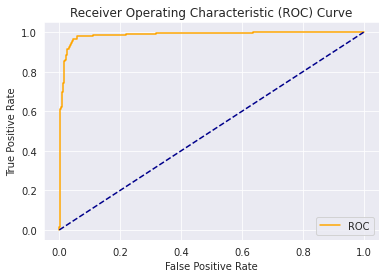

In [104]:
plot_roc_curve(fpr, tpr)